# Data Project

Imports and set magics:

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [32]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# user written modules
import dataproject

In [33]:
ind = DstApi('STRAFNA3')

In [34]:
tabsum = ind.tablesummary(language='en')
display(tabsum)

Table STRAFNA3: Persons guilty in crimes by sex, age, country of origin and time
Last update: 2023-12-12T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,KOEN,2,M,Men,K,Women,False
1,ALDER,4,TOT,"Age, total",50-79,50-79 years,False
2,IELAND,75,0000,Total,7300,"Other countries, non-western",False
3,Tid,21,2000,2000,2022,2022,True


In [35]:
# The _define_base_params -method gives us a nice template (selects all available data)
params = ind._define_base_params(language='en')
params

{'table': 'strafna3',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KOEN', 'values': ['*']},
  {'code': 'ALDER', 'values': ['*']},
  {'code': 'IELAND', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [36]:
variables = params['variables'] # Returns a view, that we can edit
variables[1]['values'] = ['TOT']
variables[3]['values'] = ['2017', '2018', '2019', '2020', '2021', '2022']
params

{'table': 'strafna3',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KOEN', 'values': ['*']},
  {'code': 'ALDER', 'values': ['TOT']},
  {'code': 'IELAND', 'values': ['*']},
  {'code': 'Tid', 'values': ['2017', '2018', '2019', '2020', '2021', '2022']}]}

In [37]:
inc_api = ind.get_data(params=params)
inc_api.head(900)

,KOEN,ALDER,IELAND,TID,INDHOLD
0,Women,"Age, total",Yugoslavia,2020,297
1,Women,"Age, total",Poland,2020,507
2,Women,"Age, total",Portugal,2020,17
3,Women,"Age, total",Romania,2020,302
4,Women,"Age, total",Switzerland,2020,14
...,...,...,...,...,...
895,Men,"Age, total",Republic of North Macedonia,2018,200
896,Men,"Age, total","Yugoslavia, Federal Republic",2018,68
897,Men,"Age, total","Other countries, total",2018,1340
898,Men,"Age, total","Other countries, western",2018,88


In [38]:
inc_api.sort_values(by='INDHOLD', inplace=True)
inc_api.tail(20)

,KOEN,ALDER,IELAND,TID,INDHOLD
750,Women,"Age, total",Total,2018,31568
601,Women,"Age, total",Denmark,2021,32458
375,Women,"Age, total",Total,2017,32868
136,Women,"Age, total",Denmark,2020,32874
150,Women,"Age, total",Total,2019,34818
450,Women,"Age, total",Total,2022,38931
600,Women,"Age, total",Total,2021,41140
135,Women,"Age, total",Total,2020,41143
826,Men,"Age, total",Denmark,2018,87452
301,Men,"Age, total",Denmark,2017,89097


In [39]:
inc_api = inc_api[inc_api['IELAND']!='Denmark']
inc_api = inc_api[inc_api['IELAND']!='Total']
inc_api.tail(20)

,KOEN,ALDER,IELAND,TID,INDHOLD
274,Men,"Age, total",Iraq,2019,1923
574,Men,"Age, total",Iraq,2022,1996
285,Men,"Age, total",Syria,2019,2028
356,Men,"Age, total",Lebanon,2017,2130
724,Men,"Age, total",Iraq,2021,2199
585,Men,"Age, total",Syria,2022,2225
109,Men,"Age, total",Iraq,2020,2228
881,Men,"Age, total",Lebanon,2018,2329
120,Men,"Age, total",Syria,2020,2389
735,Men,"Age, total",Syria,2021,2394


Dropdown(description='Gender:', options=('Men', 'Women'), value='Men')

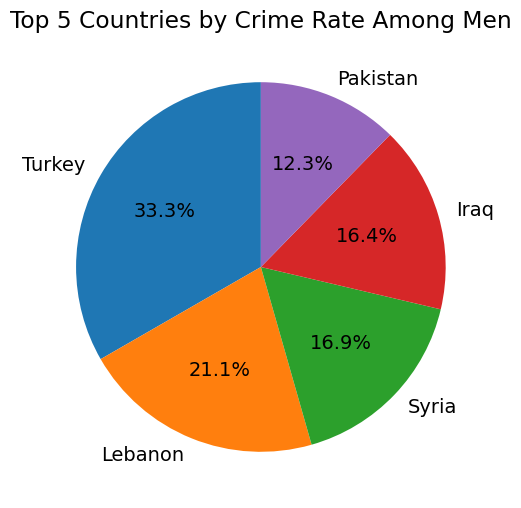

In [40]:
import ipywidgets as widgets
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Your DataFrame loading and preparation code here

def plot_pie_chart(gender):
    # Ensure you use the correct DataFrame name and column names
    filtered_data = inc_api[(inc_api['KOEN'] == gender) & 
                            (inc_api['IELAND'] != 'Total') & 
                            (inc_api['IELAND'] != 'Denmark') & 
                            (inc_api['IELAND'] != 'Other countries, non-western') & 
                            (inc_api['IELAND'] != 'Other countries, total') & 
                            (~inc_api['TID'].isin(['2017', '2018', '2019', '2020', '2021']))]
    top_countries = filtered_data.groupby('IELAND')['INDHOLD'].sum().nlargest(5)
    
    plt.figure(figsize=(10, 6))
    top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=90, ylabel='', 
                       title=f'Top 5 Countries by Crime Rate Among {gender}')
    plt.show()

def on_gender_selected(change):
    clear_output(wait=True)
    display(gender_dropdown)  # Redisplay the dropdown to ensure it persists after clearing the output
    plot_pie_chart(change['new'])

gender_dropdown = widgets.Dropdown(options=['Men', 'Women'], description='Gender:')
gender_dropdown.observe(on_gender_selected, names='value')

display(gender_dropdown)
plot_pie_chart('Men')  # Default display



Dropdown(description='Gender:', options=('Men', 'Women'), value='Men')

<Figure size 1000x600 with 0 Axes>

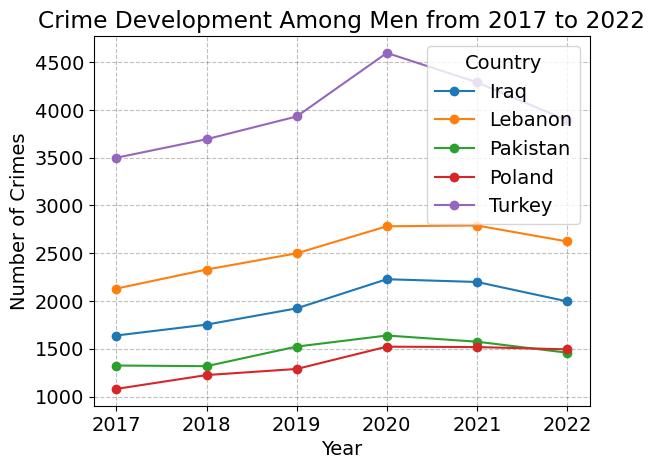

In [41]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

def plot_crime_development(gender):
    # Step 1: Filter by gender and year
    filtered_data = inc_api[(inc_api['KOEN'] == gender) & (inc_api['TID'].between(2017, 2022))]
    
    # Step 2: Further filter to include only the specified countries
    countries = ["Turkey", "Pakistan", "Iraq", "Poland", "Lebanon"]
    filtered_data = filtered_data[filtered_data['IELAND'].isin(countries)]
    
    # Step 3: Group by country and year, then sum
    grouped_data = filtered_data.groupby(['IELAND', 'TID'])['INDHOLD'].sum().unstack()
    
    # Step 4: Plot the data
    plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
    grouped_data.T.plot(kind='line', marker='o')  # Transpose to have years on the x-axis and countries as lines
    plt.title(f'Crime Development Among {gender} from 2017 to 2022')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')
    plt.grid(True)
    plt.legend(title='Country')
    plt.show()

def on_gender_selected(change):
    clear_output(wait=True)
    display(gender_dropdown)  # Redisplay the dropdown to ensure it persists after clearing the output
    plot_crime_development(change['new'])

gender_dropdown = widgets.Dropdown(options=['Men', 'Women'], description='Gender:')
gender_dropdown.observe(on_gender_selected, names='value')

display(gender_dropdown)
plot_crime_development('Men')  # Default display


In [42]:
indvan = DstApi('INDVAN')

tabsum = indvan.tablesummary(language='en')
display(tabsum)

Table INDVAN: Immigration by sex, age, citizenship, country of last residence and time
Last update: 2024-02-12T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,KØN,2,M,Men,K,Women,False
1,ALDER,126,0,0 years,125,125 years,False
2,STATSB,2,DANSK,Denmark,UDLAND,Foreign,False
3,INDVLAND,242,5901,Faroe Islands,5999,Not stated,False
4,Tid,44,1980,1980,2023,2023,True


In [46]:
# The _define_base_params -method gives us a nice template (selects all available data)
params = indvan._define_base_params(language='en')
params

{'table': 'indvan',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KØN', 'values': ['*']},
  {'code': 'ALDER', 'values': ['*']},
  {'code': 'STATSB', 'values': ['*']},
  {'code': 'INDVLAND', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [47]:
variables = params['variables'] # Returns a view, that we can edit
variables[4]['values'] = ['2017', '2018', '2019', '2020', '2021', '2022']
params

{'table': 'indvan',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KØN', 'values': ['*']},
  {'code': 'ALDER', 'values': ['*']},
  {'code': 'STATSB', 'values': ['*']},
  {'code': 'INDVLAND', 'values': ['*']},
  {'code': 'Tid', 'values': ['2017', '2018', '2019', '2020', '2021', '2022']}]}

In [48]:
indvan_api = indvan.get_data(params=params)
indvan_api.head(900)

,KØN,ALDER,STATSB,INDVLAND,TID,INDHOLD
0,Men,8 years,Foreign,Portugal,2018,1
1,Men,9 years,Denmark,Switzerland,2018,1
2,Women,15 years,Denmark,South Africa,2018,1
3,Women,52 years,Foreign,Ireland,2018,1
4,Men,59 years,Foreign,Belgium,2018,1
...,...,...,...,...,...,...
895,Women,29 years,Denmark,Philippines,2018,1
896,Men,67 years,Denmark,Namibia,2018,1
897,Men,74 years,Denmark,Not stated,2018,1
898,Men,16 years,Denmark,Lebanon,2018,2


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [2]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

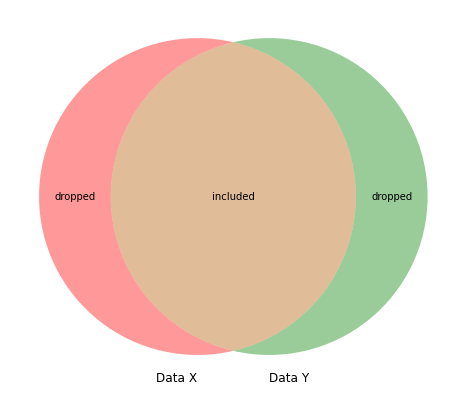

In [3]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.